In [29]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

np.random.seed(42)
X, y = make_blobs(n_samples=2000, centers=5, n_features=10, random_state=42, cluster_std=2.0)
Y = np.eye(5)[y]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
y_test_true = np.argmax(Y_test, axis=1)

print("Dataset ready: 2000 samples, 5 classes")

Dataset ready: 2000 samples, 5 classes


In [30]:

class SimpleNN:
    def __init__(self):

        self.W1 = np.random.randn(10, 50) * 0.5
        self.W2 = np.random.randn(50, 30) * 0.5
        self.W3 = np.random.randn(30, 20) * 0.5
        self.W4 = np.random.randn(20, 5)  * 0.5

    def forward(self, X):
        h1 = 1 / (1 + np.exp(-X @ self.W1))
        h2 = 1 / (1 + np.exp(-h1 @ self.W2))
        h3 = 1 / (1 + np.exp(-h2 @ self.W3))
        out = h3 @ self.W4
        exp = np.exp(out - np.max(out, axis=1, keepdims=True))
        return exp / np.sum(exp, axis=1, keepdims=True)

    def train(self, X, Y):
        h1 = 1 / (1 + np.exp(-X @ self.W1))
        h2 = 1 / (1 + np.exp(-h1 @ self.W2))
        h3 = 1 / (1 + np.exp(-h2 @ self.W3))
        pred = self.forward(X)
        error = Y - pred


        self.W4 += 0.1 * (h3.T @ error) / len(X)
        self.W3 += 0.1 * (h2.T @ (error @ self.W4.T * h3 * (1-h3))) / len(X)
        self.W2 += 0.1 * (h1.T @ ((error @ self.W4.T * h3 * (1-h3)) @ self.W3.T * h2 * (1-h2))) / len(X)
        self.W1 += 0.1 * (X.T @ (((error @ self.W4.T * h3 * (1-h3)) @ self.W3.T * h2 * (1-h2)) @ self.W2.T * h1 * (1-h1))) / len(X)

Training started (3 hidden layers)...
Epoch 0 → Loss: 2965.4909
Epoch 1000 → Loss: 44.7591
Epoch 2000 → Loss: 17.8806
Epoch 3000 → Loss: 10.7281
Epoch 4000 → Loss: 7.5218
Epoch 5000 → Loss: 5.7276
Epoch 6000 → Loss: 4.5913
Epoch 7000 → Loss: 3.8123
Epoch 8000 → Loss: 3.2481
Epoch 9000 → Loss: 2.8225
Epoch 10000 → Loss: 2.4912


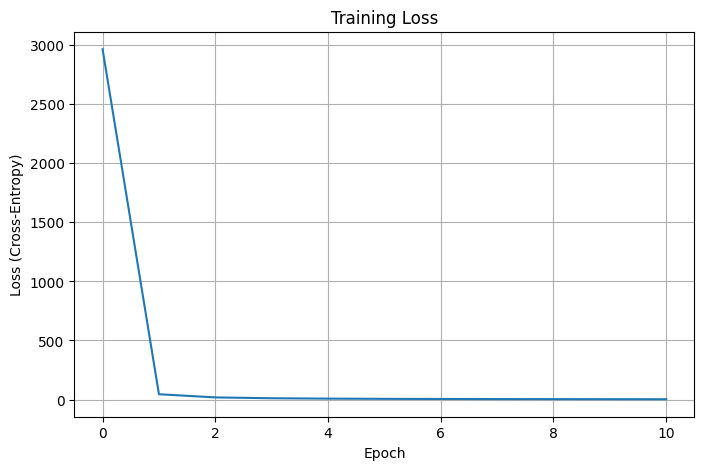

In [31]:

nn = SimpleNN()
losses = []

print("Training started (3 hidden layers)...")
for epoch in range(10001):
    nn.train(X_train, Y_train)
    if epoch % 1000 == 0:
        pred = nn.forward(X_train)
        loss = -np.mean(np.sum(Y_train * np.log(pred + 1e-10)))
        losses.append(loss)
        print(f"Epoch {epoch} → Loss: {loss:.4f}")


plt.figure(figsize=(8,5))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss (Cross-Entropy)")
plt.title("Training Loss")
plt.grid(True)
plt.show()


FINAL TEST ACCURACY: 100.00%


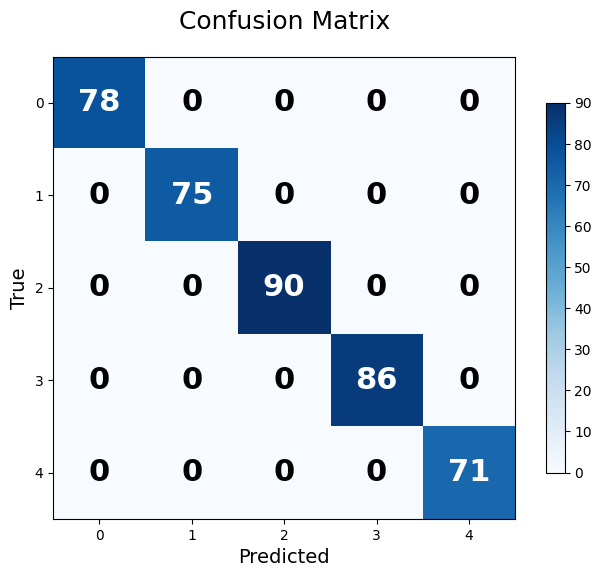

In [32]:

pred_test = nn.forward(X_test)
pred_labels = np.argmax(pred_test, axis=1)
accuracy = np.mean(pred_labels == y_test_true) * 100
print(f"\nFINAL TEST ACCURACY: {accuracy:.2f}%")

cm = np.zeros((5,5), int)
for i in range(len(y_test_true)):
    cm[y_test_true[i], pred_labels[i]] += 1

plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.colorbar(shrink=0.8)
for i in range(5):
    for j in range(5):
        color = 'white' if cm[i,j] > 30 else 'black'
        plt.text(j, i, cm[i,j], ha='center', va='center', color=color, fontsize=22, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, pad=20)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.xticks(range(5))
plt.yticks(range(5))
plt.show()